# Movie Review Classification 

## IOT - OTT Platforms

### Importing Necessary Libraries

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.3.0'

In [3]:
pip install tensorflow_datasets

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow_hub

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/opt/tljh/user/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow_hub as hub
from tensorflow.keras.models import load_model
%matplotlib inline

### Importing Dataset from Tensorflow

In [6]:
tfds.list_builders()

['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_mujoco_ant',
 'd4rl_mujoco_halfcheetah',
 'dart',
 'davis',
 'deep_weeds',
 'definite_pronoun_resolution',
 'dementiab

### Dividing the data in Train, Test, Validation

In [7]:
train_data, validation_data, test_data = tfds.load(name = "imdb_reviews",split=('train[:60%]', 'train[60%:]', 'test'),
    as_supervised=True)

### Reading Data

In [8]:
train_examples_batch , train_labels_batch = next(iter(train_data.batch(5)))
train_examples_batch 

<tf.Tensor: shape=(5,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [ ]:
train_examples_batch = train_examples_batch[]

In [9]:
train_labels_batch

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([0, 0, 0, 1, 1])>

### Preprocessing

In [10]:
preprocessed = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim/1"
hub_layer = hub.KerasLayer(preprocessed,input_shape = [],dtype = tf.string, trainable = True)

In [11]:
hub_layer(train_examples_batch[:2])

<tf.Tensor: shape=(2, 20), dtype=float32, numpy=
array([[ 1.765786  , -3.882232  ,  3.9134233 , -1.5557289 , -3.3362343 ,
        -1.7357955 , -1.9954445 ,  1.2989551 ,  5.081598  , -1.1041286 ,
        -2.0503852 , -0.72675157, -0.65675956,  0.24436149, -3.7208383 ,
         2.0954835 ,  2.2969332 , -2.0689783 , -2.9489717 , -1.1315987 ],
       [ 1.8804485 , -2.5852382 ,  3.4066997 ,  1.0982676 , -4.056685  ,
        -4.891284  , -2.785554  ,  1.3874227 ,  3.8476458 , -0.9256538 ,
        -1.896706  ,  1.2113281 ,  0.11474707,  0.76209456, -4.8791065 ,
         2.906149  ,  4.7087674 , -2.3652055 , -3.5015898 , -1.6390051 ]],
      dtype=float32)>

In [12]:
train_examples_batch[:2]

<tf.Tensor: shape=(2,), dtype=string, numpy=
array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell a

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

### Model

In [14]:
model = Sequential()
model.add(hub_layer)
model.add(Dense(16, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 20)                400020    
_________________________________________________________________
dense (Dense)                (None, 16)                336       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 400,373
Trainable params: 400,373
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer = 'rmsprop',metrics =['accuracy'],loss = 'binary_crossentropy')

In [17]:
training  = model.fit(train_data.shuffle(1000).batch(512),verbose = 1, epochs = 20, validation_data= validation_data.batch(512))

Epoch 1/20
30/30 [==============================] - 2s 70ms/step - loss: 0.7489 - accuracy: 0.5689 - val_loss: 0.6384 - val_accuracy: 0.6418
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.6130 - accuracy: 0.6669 - val_loss: 0.5975 - val_accuracy: 0.6876
Epoch 3/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5719 - accuracy: 0.7096 - val_loss: 0.5613 - val_accuracy: 0.7204
Epoch 4/20
30/30 [==============================] - 1s 40ms/step - loss: 0.5342 - accuracy: 0.7434 - val_loss: 0.5291 - val_accuracy: 0.7432
Epoch 5/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4978 - accuracy: 0.7722 - val_loss: 0.5056 - val_accuracy: 0.7606
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.4635 - accuracy: 0.7943 - val_loss: 0.4685 - val_accuracy: 0.7868
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4278 - accuracy: 0.8163 - val_loss: 0.4387 - val_accuracy: 0.8059
Epoch 8/20
30

In [18]:
model.save('movie_model.h5')

In [19]:
#model = load_model('movie_model.h5')

### Analysis

Training Accuracy at first epoch:  0.5688666701316833
Trainig Accuracy at last epoch:  0.9308000206947327
Validation Accuracy at first epoch:  0.6417999863624573
Validation Accuracy at last epoch:  0.8701000213623047


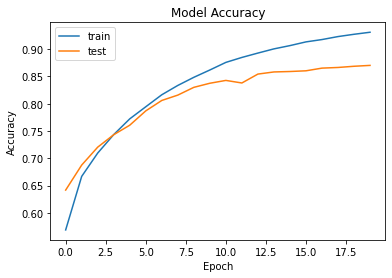

In [20]:
print("Training Accuracy at first epoch: ",training.history["accuracy"][0])
print("Trainig Accuracy at last epoch: ",training.history['accuracy'][19])
print("Validation Accuracy at first epoch: ",training.history["val_accuracy"][0])
print("Validation Accuracy at last epoch: ",training.history['val_accuracy'][19])
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

Training Loss at first epoch:  0.748867392539978
Trainig Loss at last epoch:  0.1909065544605255
Validation Loss at first epoch:  0.6384159922599792
Validation Loss at last epoch:  0.30774861574172974


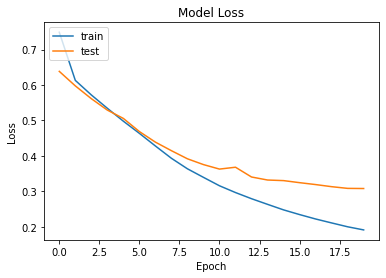

In [21]:
print("Training Loss at first epoch: ",training.history["loss"][0])
print("Trainig Loss at last epoch: ",training.history['loss'][19])
print("Validation Loss at first epoch: ",training.history["val_loss"][0])
print("Validation Loss at last epoch: ",training.history['val_loss'][19])
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')

### Prediction

In [22]:
results = model.predict(test_data.batch(512), verbose=2)

49/49 - 2s


In [23]:
results

array([[0.5152047 ],
       [0.8850579 ],
       [0.17534463],
       ...,
       [0.00929659],
       [0.97690547],
       [0.9899447 ]], dtype=float32)

In [24]:
for i in range(6):
    if results[i] > 0.5:
        print("Positive Review")
    else:
        print("Negative Review")

Positive Review
Positive Review
Negative Review
Negative Review
Positive Review
Positive Review


In [25]:
prediction = model.predict(['I didnt like the movie but it was good'])
prediction

array([[0.6267606]], dtype=float32)

In [26]:
if prediction > 0.5:
      print("Positive Review")
else:
      print("Negative Review")  

Positive Review


### Evaluation

In [27]:
eval = model.evaluate(test_data.batch(512), verbose=2)

49/49 - 1s - loss: 0.3179 - accuracy: 0.8640
